# Classification

## Practical part 1

### Toy dataset 
We define two datasets of desired properties to understand the differences between logistic regression and KNN.

- Let's assume we have two feastures $x_1, x_2 \in [-1;1]$ and a binary target $y$. 
- We define our first dataset in the way that y emerges from a linear relationship betweem $x_1$ and $x_2$: 
$$
y = \left\{\begin{array}{cc} 0 & x_2 \le f(x_1) \\ 1 & x_2 > f(x_1)\end{array}    \right.
$$

with a linear function $f(x) = 0.7x + 0.3 + \epsilon$ and a noise term $\epsilon \sim \mathcal{N}(0, 0.3)$.

- The second dataset consists of a Gaussian mixture: We sample points $(x_1,x_2)$ according to a two dimensional Gaussian distribution around a center point $\mu_i =(\mu_{i,1}, \mu_{i,2})$. We assume four center points. The points normally distributed around the first two center points ($\mu_1$ and $\mu_2$) belong to class 1, the points sampled around $\mu_3$ and $\mu_4$ belong to class 0.
Use $\mu_1 = (-0.8, 0.8)$, $\mu_2 = (0.5, -0.9)$, $\mu_3= (-0.8, -0.8)$, and $\mu_4 = (0.5, 0.6)$.




In [17]:
import numpy as np
np.random.seed(42)
N=1000
x1=np.random.uniform(-1,1,N)
x2=np.random.uniform(-1,1,N)
fx1= 0.7*x1 + 0.3 + np.random.normal(0,0.3,x1.shape)
y= (x2>fx1).astype(int)

In [18]:
import pandas as pd
data={'x1':x1,'x2':x2,'y':y}
data_1=pd.DataFrame(data)

In [19]:
x1

array([-0.25091976,  0.90142861,  0.46398788,  0.19731697, -0.68796272,
       -0.68801096, -0.88383278,  0.73235229,  0.20223002,  0.41614516,
       -0.95883101,  0.9398197 ,  0.66488528, -0.57532178, -0.63635007,
       -0.63319098, -0.39151551,  0.04951286, -0.13610996, -0.41754172,
        0.22370579, -0.72101228, -0.4157107 , -0.26727631, -0.08786003,
        0.57035192, -0.60065244,  0.02846888,  0.18482914, -0.90709917,
        0.2150897 , -0.65895175, -0.86989681,  0.89777107,  0.93126407,
        0.6167947 , -0.39077246, -0.80465577,  0.36846605, -0.11969501,
       -0.75592353, -0.00964618, -0.93122296,  0.8186408 , -0.48244004,
        0.32504457, -0.37657785,  0.04013604,  0.09342056, -0.63029109,
        0.93916926,  0.55026565,  0.87899788,  0.7896547 ,  0.19579996,
        0.84374847, -0.823015  , -0.60803428, -0.90954542, -0.34933934,
       -0.22264542, -0.45730194,  0.65747502, -0.28649335, -0.43813098,
        0.08539217, -0.71815155,  0.60439396, -0.85089871,  0.97

In [20]:
# TODO first toy dataset

In [21]:
# TODO Second toy dataset
#np.random.seed(42)
u1=np.random.uniform(-0.8,0.8)
u2=np.random.uniform(0.5,-0.9)
u3=np.random.uniform(-0.8,-0.8)
u4=np.random.uniform(0.5,0.6)


In [22]:
u1,u2,u3,u4

(0.06544800614092927, -0.4750017298505501, -0.8, 0.5171693907705449)

### Tasks
- Split the dataset into training and test (choose an appropriate split)
- Predict on both datasets with logistic regression and k-NN. 
- Familiarize with the default settings for logistic regression in scikit-learn.
- Choose an appropriate neighborhood size for KNN. The ideal solution is to search for $k$ using cross-vaidation. 


Useful links:
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 

# Instantiate the models
regg_1 = LogisticRegression()
knn_1 = KNeighborsClassifier(n_jobs=2)
x1 = x1.reshape(-1, 1)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.15, random_state=42)

# Fit the models
regg_1.fit(X_train, y_train)
pred_regg = regg_1.predict(X_test)
knn_1.fit(X_train, y_train)
pred_knn = knn_1.predict(X_test)

# Print model scores using X_test and y_test
print(f'The model score of knn is : {knn_1.score(X_test, y_test)}')
print(f'The model score of regg is : {regg_1.score(X_test, y_test)}')


The model score of knn is : 0.5933333333333334
The model score of regg is : 0.6666666666666666


## Practical Part 2: Iris Dataset

- Predict the iris type using logistic regression. 
- Visualize classifications, among other things, with a confusion matrix. 
- Evaluate your model using
    - accuracy
    - precision and recall
    - F1 score.


In [24]:
# TODO 
from sklearn.datasets import load_iris
iris= load_iris()
X= iris.data
y=iris.target

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=42, test_size=0.20)

In [26]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

model.fit(X_train, y_train)


LogisticRegression()

In [27]:
y_pred=model.predict(X_test)

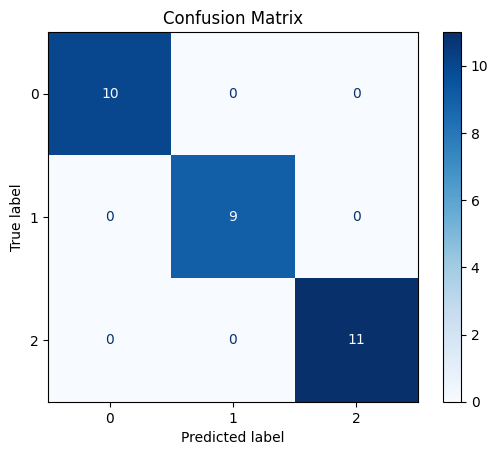

The accuracy of the model is 1.0
The precision of the model is 1.0
The recall of the model is 1.0
The f1_score of the model is 1.0


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

acc=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred, average='macro')
recall=recall_score(y_test,y_pred, average='macro')
f1=f1_score(y_test,y_pred, average='macro')
matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
print(f'The accuracy of the model is {acc}')
print(f'The precision of the model is {precision}')
print(f'The recall of the model is {recall}')
print(f'The f1_score of the model is {f1}')

In [29]:
# using k fold cv
from sklearn.model_selection import cross_val_score
clf= cross_val_score(model,X,y,n_jobs=5,scoring='accuracy')
clf

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])